In [10]:
import numpy as np
import math
from numpy import linalg as alg
from numpy.linalg import eig
import copy
from google.colab import files
import io
import matplotlib.pyplot as plt

###Funciones para leer puntos de un archivo txt y guardarlos en un arreglo

In [2]:
#Ejemplo para Sample
#Para population se divide sobre n en lugar de n-1

def leerPuntos(nombre_archivo):
  uploaded = files.upload()
  DATA = uploaded[nombre_archivo].decode("utf-8").split("\n")

  #Filtramos respecto a los saltos de linea
  for i in range(len(DATA)):
    DATA[i] = DATA[i].split("\n")

  data = [] #arreglo de coordenadas de los puntos
  A1 = []
  A2 = []
  A3 = []

  #filtramos y guardamos excepto al ultimo porque el ultimo es una coordenada vacia
  for i in range(len(DATA) - 1): 
    hold = DATA[i][0].split(' ') 
    point = []
    A1 .append(float(hold[0]))
    A2.append(float(hold[1])) 
    A3.append(float(hold[2]))
  data.append(A1)
  data.append(A2)
  data.append(A3)

  return data

### Funciones para calcular la covarianza de un conjunto de puntos


In [3]:
def promedio(A, n):
  sum = 0
  for i in range(0,n):
    sum += A[i]

  return sum/n

def Var(A,n):
  mu = promedio(A,n)

  sum = 0
  for i in range(0,n):
    sum += (A[i]-mu)**2

  return sum/(n-1)

def Covar(A,B,n): #Cov(X,Y) = Cov(Y,X)
  mu_x = promedio(A,n)
  mu_y = promedio(B,n)

  sum = 0
  for i in range(0,n):
    sum += (A[i]-mu_x)*(B[i]-mu_y)

  return sum/(n-1)


def build_cov(data, n, m):
  Mat = np.zeros((m,m))

  for i in range(0,m):
    for j in range(i,m):
      if i==j:
        Mat[i][j] = Var(data[i],n)
      else:
        extra = Covar(data[i], data[j], n)
        Mat[i][j] = extra
        Mat[j][i] = extra

  return Mat

### Funcion para calcular el punto promedio de una nube de datos

In [4]:
def moverAlOrigen(data, total):
  mu_x = promedio(data[0], total)
  mu_y = promedio(data[1], total)
  mu_z = promedio(data[2], total)

  for i in range(0, total):
    data[0][i] -= mu_x
    data[1][i] -= mu_y
    data[2][i] -= mu_z
  
  return data

def rotarPuntos(points, n, mat_rot):
  data = np.array(points[:])
  hold = np.array(data[:])
  for i in range(0, n):
    for j in range(0, 3):
      hold[j][i] = data[0][i]*mat_rot[j][0] + data[1][i]*mat_rot[j][1] + data[2][i]*mat_rot[j][2]

  points = hold.tolist()
  return points

###Funcion para graficar

In [5]:
def graficar_puntos(data, fig, color, size):
  #pinta la nube original en su lugar correspondiente
  plt.figure(fig)

  plt.title("Original")
  ax = plt.axes(projection = '3d')
  ax.set(xlim = (-size, size), ylim = (-size, size), zlim = (-size, size))
  ax.scatter(data[0], data[1], data[2], s = 1, c = color)
  plt.xlabel("Eje X.")
  plt.ylabel("Eje Y.")

### Codigo principal

In [6]:
nube1 = leerPuntos("kalibar.txt")
nube2 = leerPuntos("kalibarROT.txt")

Saving kalibar.txt to kalibar.txt


Saving kalibarROT.txt to kalibarROT.txt


Total de puntos leidos:  12763
Nube 1
La matriz de covarianza de la nube 1 es:
 [[ 6801.40358601   -34.97397065 -1117.62278686]
 [  -34.97397065  3797.52964796   126.9905894 ]
 [-1117.62278686   126.9905894    352.80592171]]
Los eigenvalores son:  [6990.57673409  160.67898687 3800.48343472]
La matriz de rotacion 1 es: 
 [[ 0.98591553 -0.0174142  -0.16633492]
 [-0.16570679  0.03282239 -0.98562871]
 [-0.02262344 -0.99930948 -0.02947446]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Total de puntos leidos:  12763
Nube 2
La matriz de covarianza de la nube 1 es:
 [[ 4415.60570758  -916.74386701   869.4518931 ]
 [ -916.74386701  3847.34811737 -3051.32333343]
 [  869.4518931  -3051.32333343  2689.06107438]]
Los eigenvalores son:  [6991.24574053 3800.16857595  160.60058286]
La matriz de rotacion 2 es: 
 [[-0.43974616  0.68824663 -0.57700943]
 [ 0.02124554 -0.63431079 -0.77278616]
 [ 0.89787078  0.35208862 -0.26431357]]


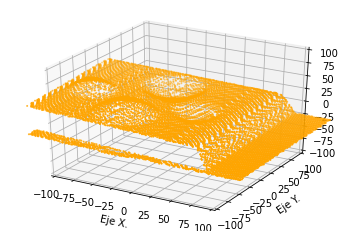

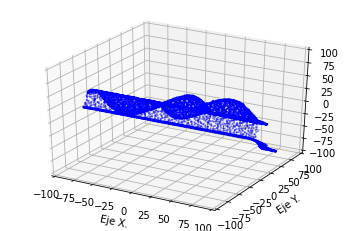

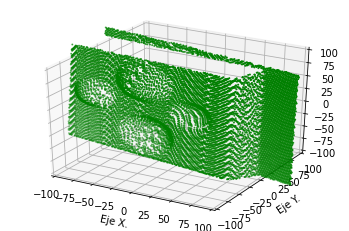

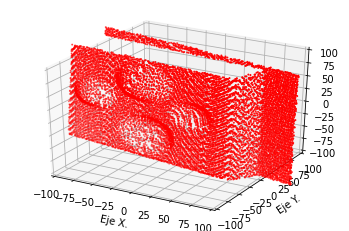

In [11]:
size = 100
n1 = len(nube1[0])
print("Total de puntos leidos: ", n1)

#Trasladamos al origen y graficamos
nube1 = moverAlOrigen(nube1, n1)
print("Nube 1")
graficar_puntos(nube1, 1, 'orange', size)

#Obtenemos matriz de covarianza de la nube 1
mat_cov1 = build_cov(nube1, n1, 3)
print("La matriz de covarianza de la nube 1 es:\n", mat_cov1)

#Eigenvalores y eigenvectores
eigenvals1, matriz_rot1 = eig(mat_cov1)
print("Los eigenvalores son: ", eigenvals1)

#Invertimos la matriz de rotacion
matriz_rot1 = np.linalg.inv(matriz_rot1)
print("La matriz de rotacion 1 es: \n", matriz_rot1)

#Rotamos a su posicion original
nube1_rot = nube1.copy()
nube1_rot = rotarPuntos(nube1_rot, n1, matriz_rot1)

#----------------------------------------
# -------------- N U B E  2 -------------
#----------------------------------------
n2 = len(nube2[0])
print("Total de puntos leidos: ", n2)

#Trasladamos al origen
nube2 = moverAlOrigen(nube2, n2)
print("Nube 2")
graficar_puntos(nube2, 2, 'blue', size)

#Obtenemos matriz de covarianza de la nube 2
mat_cov2 = build_cov(nube2, n2, 3)
print("La matriz de covarianza de la nube 1 es:\n", mat_cov2)

#Eigenvalores y eigenvectores
eigenvals2, matriz_rot2 = eig(mat_cov2)
print("Los eigenvalores son: ", eigenvals2)
for i in range(0, 3):
  matriz_rot2[i][0] *= -1
  matriz_rot2[i][1], matriz_rot2[i][2] = -matriz_rot2[i][2], -matriz_rot2[i][1]
  

#Invertimos la matriz de eigenvalores
matriz_rot2 = np.linalg.inv(matriz_rot2)
print("La matriz de rotacion 2 es: \n", matriz_rot2)

#Rotamos a su posicion original y graficamos
nube2_rot = nube2.copy()
nube2_rot = rotarPuntos(nube2_rot, n2, matriz_rot2)


##------------- NUBES ALINEADAS --------------
graficar_puntos(nube1_rot, 3, 'green', size)
graficar_puntos(nube2_rot, 4, 'red', size)